In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 단순 선형 회귀 분석

sns.get_dataset_names()

# 1. 문제 정의
# 우리가 분석할 것은 각 칼럼과 연비의 관계
# 모델을 학습시켜서 연비를 예측한다.

# 2. 데이터 수집
df_mpg = sns.load_dataset('mpg')
df_mpg.head()

# mpg : 연비
# cylinders : 실린더 수
# displacement : 엔진 배기량
# horsepower : 마력
# weight : 차의 무게
# acceleration : 가속력
# model_year : 모델 제조 연도
# origin : 출시 국가
# name : 자동차 모델명

# 3. 데이터 전처리

df_mpg.info()

df_mpg.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
# 결측치 확인
df_mpg.isna().sum()

s_isna = df_mpg['horsepower'].isna()
s_isna

# 결측치 행만 조회
df_mpg[s_isna]

df_mpg.dropna(subset=['horsepower'], inplace=True)
df_mpg.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [10]:
df_mpg.head()

df_data = df_mpg.loc[:, 'mpg':'acceleration']

df_data


,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


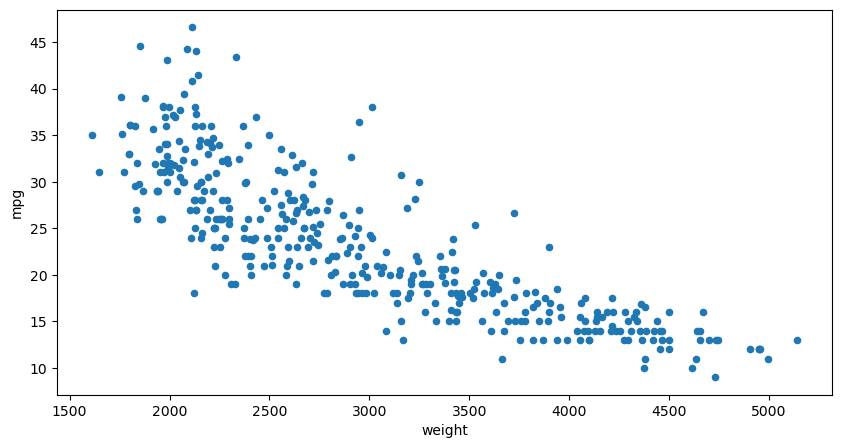

In [13]:
# 데이터들의 관계를 분석할 때 산점도 그래프를 활용하면 한 눈에 파악하기 좋다.
# 특히 회귀분석에서 산점도 그래프를 자주 사용한다.
fig, ax = plt.subplots(1,1, figsize=(10,5))
df_data.plot.scatter(x='weight', y='mpg', ax=ax)

plt.show()

# 산점도 그래프를 볼 때 각데이터를 표현하는 점들이 하나의 선 모양에 가깝다면
# 두 칼럼(변수) 간에 강한 선형 관계를 가지는 것이다.(패턴이 있다는 의미)
# 점이 퍼져있을 수록 (선의 형태가 아닐수록) 두 변수는 관계가 없다.
# 선의 형태에서 특정 데이터들이 크게 벗어나 있다면 해당 데이터를 이상치로 판단할 수 있다.

# 현재 무게와 연비는 어느정도 선의 형태를 띄고 있으며, 선의 방향이 좌상 -> 좌하 방향으로 나타나고 있다.
# 이는 음의 관계 (한 변수의 값이 증가하면 다른 변수의 값은 감소)를 의미한다.

# 이렇게 선형적인 관계가 관찰되었다면 이 두 변수는 선형 회귀 분석 모델에 사용할 수 있다는 의미이다.
# 즉, 우리는 이 산점도 그래프를 통해 모델에 학습시킬 칼럼(피처, 속성)을 선정하는 것이다.
# 여기서 X:독립변수(원인)은 무게, y:종속변수(결과)는 연비이다.

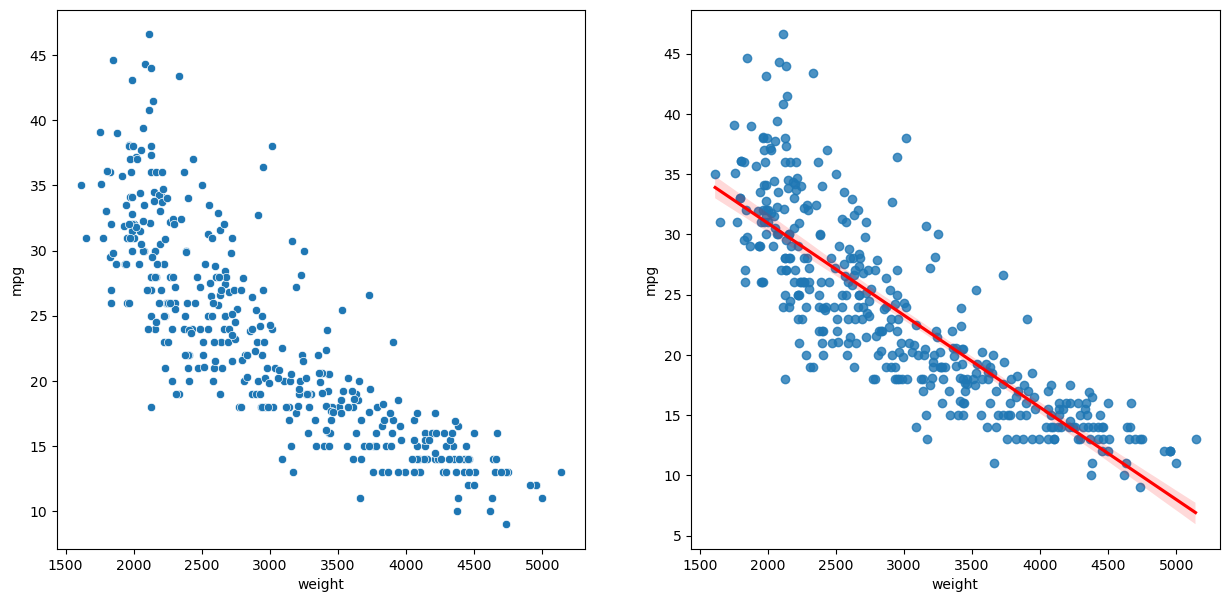

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))

# 기본적인 산점도 차트 생성
sns.scatterplot(data=df_data, x='weight', y='mpg', ax=ax[0])
# regplot() : 회귀선을 포함한 산점도 차트 생성
sns.regplot(data=df_data, x='weight', y='mpg', ax=ax[1], line_kws={'color':'red'})

plt.show()

# 회귀선이란?
# 선형 회귀 분석에서 중요한 개념
# 단순 선형 회귀는 두 변수의 관계를 가장 잘 나타내는 직선을 찾는것이 목표이다. 이 선을 회귀선이라고 한다.
# 회귀선은 산점도 그래프 위에 그려지고 두 변수와의 관계를 시각적으로 보여주기 위해 사용한다.
# 회귀선과 데이터(점)의 거리를 잔차라고 이야기 하며, 이 잔차가 클 수록 두 변수의 관계가 부정확하며
# 잔차가 작아 점들이 회귀선에 가까울 수록 두 변수는 서로 관계가 크다고 할 수 있다.

# y = w * x + b
# y : 종속변수(결과), 연비
# x : 독립변수(원인), 무게

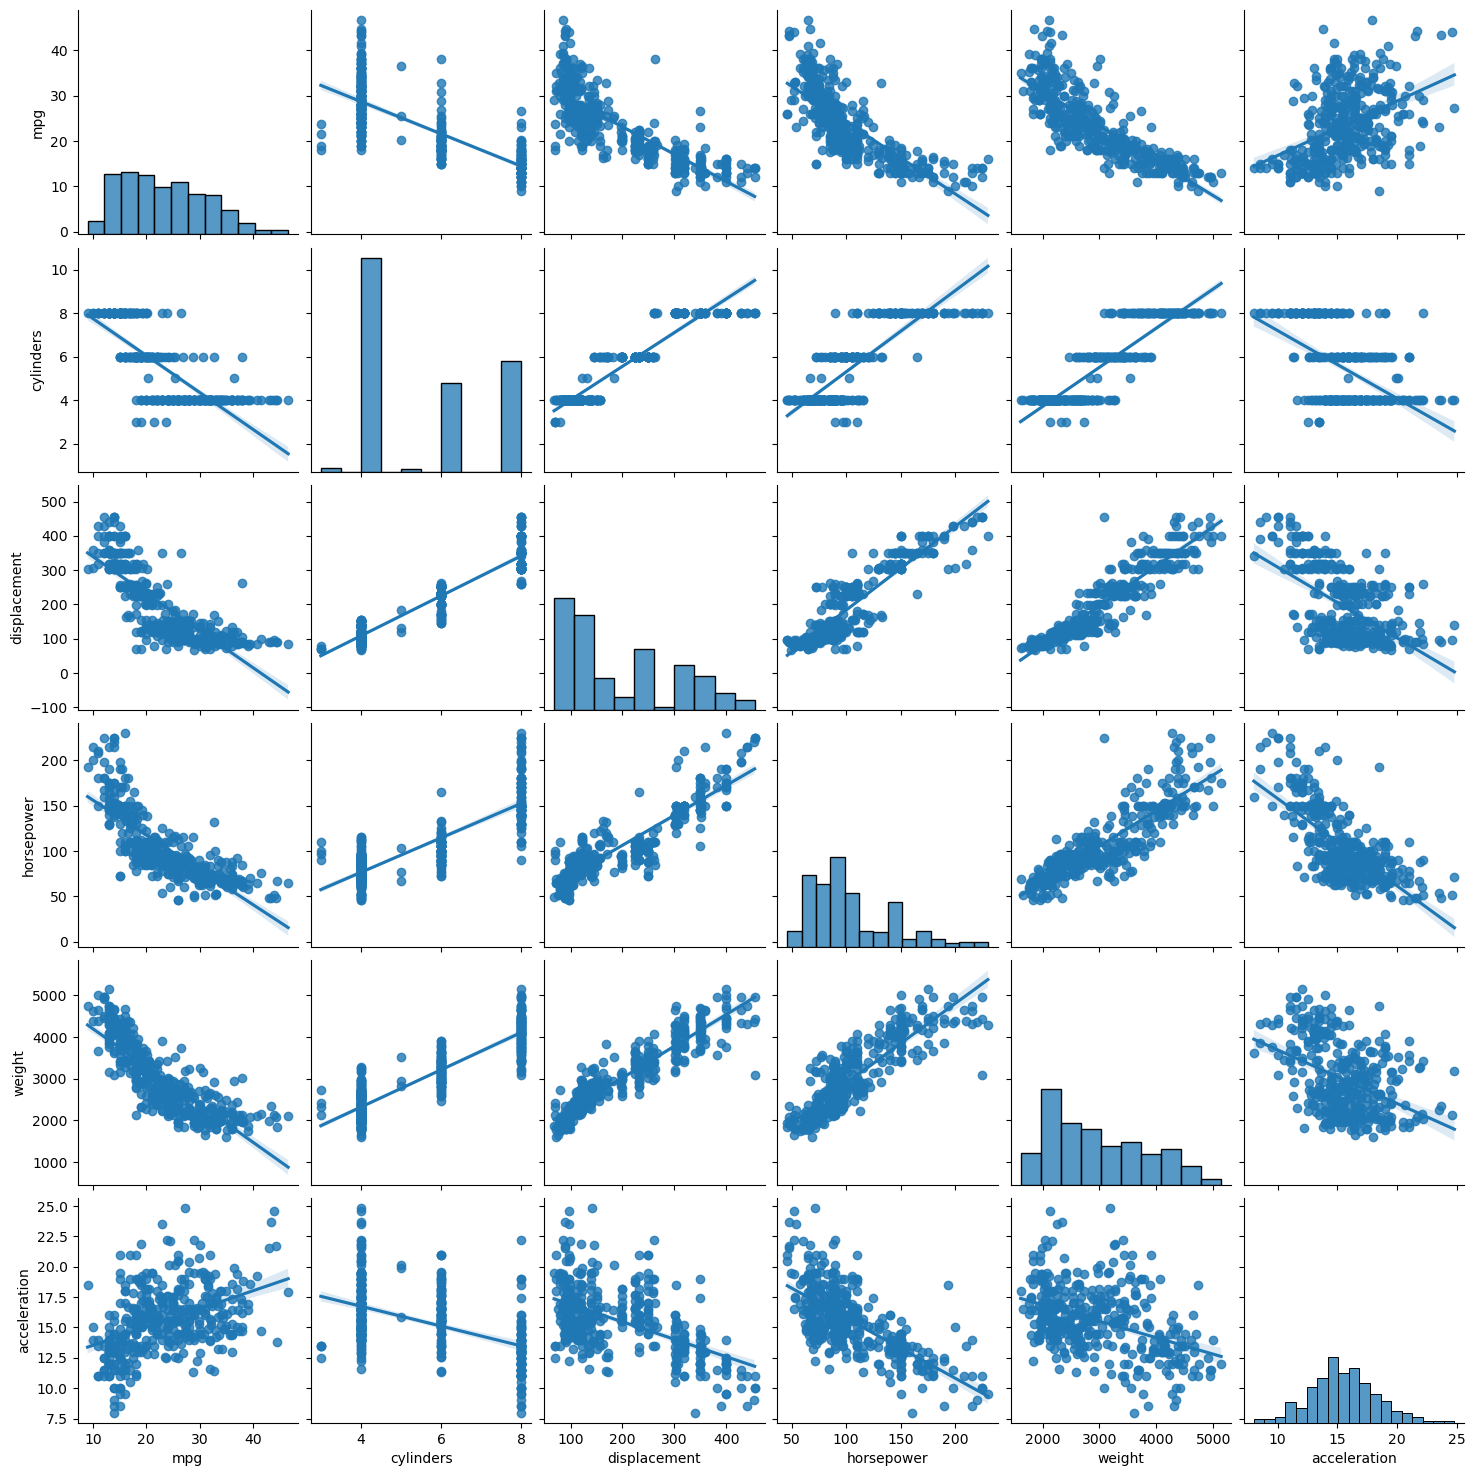

In [19]:
# 이렇게 각 칼럼들이 연비와 얼마나 관련성이 있는지 한 눈에 파악하기위해 시각화를 진행하는데
# 경우의 수가 너무 많다.
# 이경우 seaborn의 pairplot()을 활용하면 모든 경우의 수에 대한 관계를 한 번에 볼 수 있다.

# pairplot()은 데이터 프레임의 각 칼럼별 관계를 모두 산점도로 보여주며,
# 자기 자신과의 관계는 히스토그램으로 데이터 분포를 보여준다.
# sns.pairplot(data=df_data)

sns.pairplot(data=df_data, kind='reg')

In [21]:

# 변수 선택과 분리

# 우리가 산점도 차트를 통해 배기량, 마력, 무게가 연비와 관계성이 어느정도 있다는 것을 파악했다.
# 종속변수를 연비로 사용했을 때 독립변수에 배기량, 마력, 무게를 선택할 수 있다는 힌트를 얻은 것이다.

# 종속변수 선택과 분리
y = df_data['mpg']

y

# 독립변수 선택과 분리
X_displacement = df_data['displacement']
X_horsepower = df_data['horsepower']
X_weight = df_data['weight']

X_weight



0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 392, dtype: int64